Shape of dataset: (1470, 31)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   object 
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole            

C:\Users\shekh\AppData\Local\Temp\ipykernel_18704\3293730009.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\shekh\AppData\Local\Temp\ipykernel_18704\3293730009.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

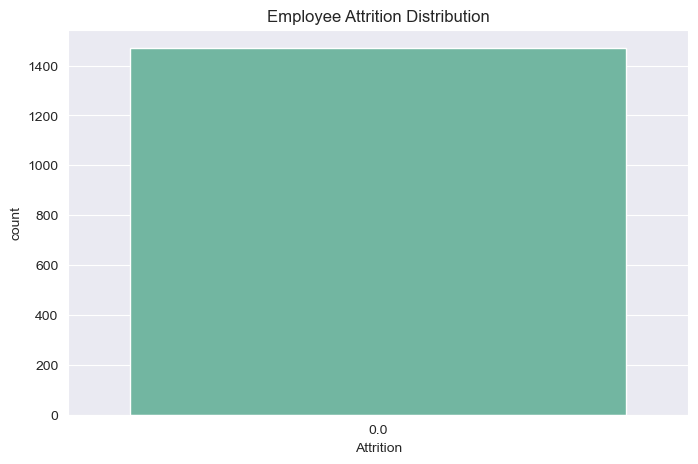

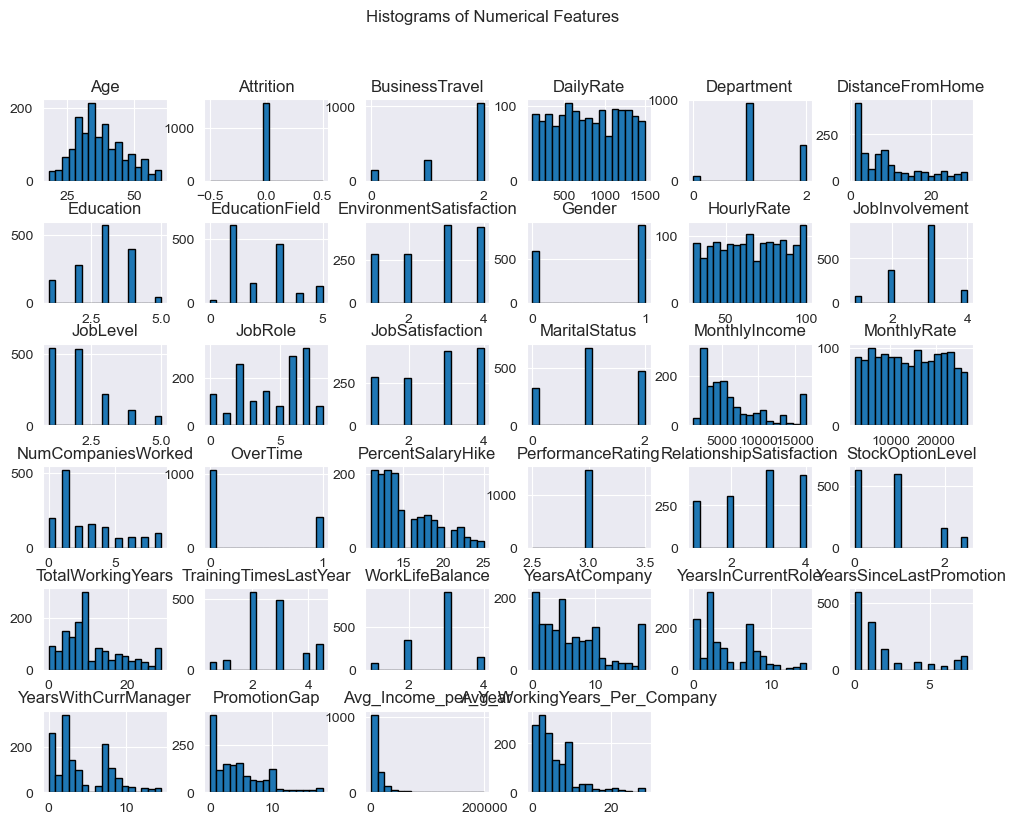

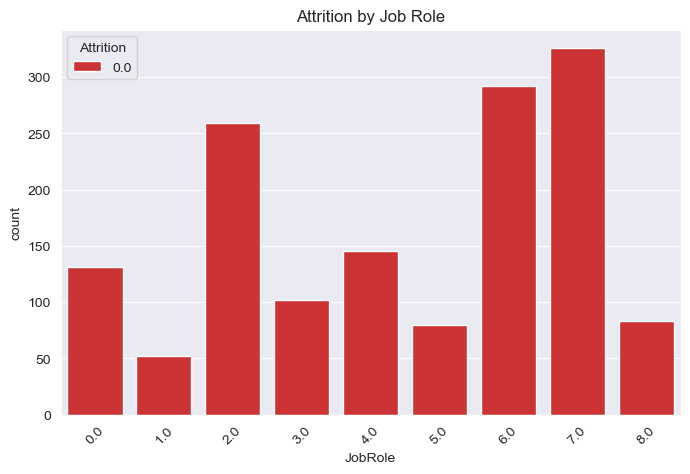

C:\Users\shekh\AppData\Local\Temp\ipykernel_18704\3293730009.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette="Set3")


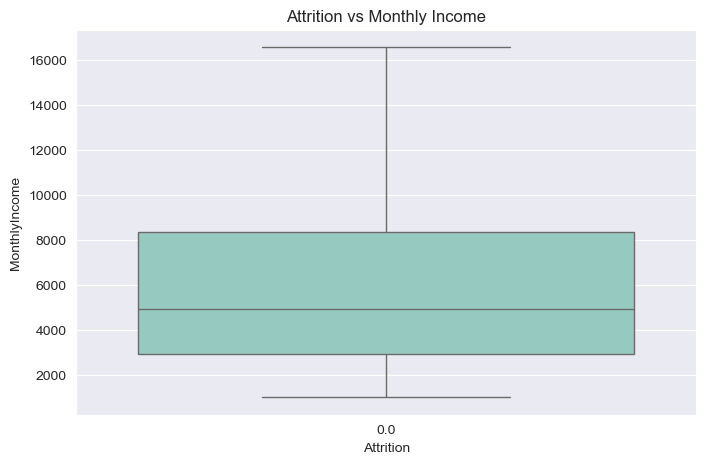

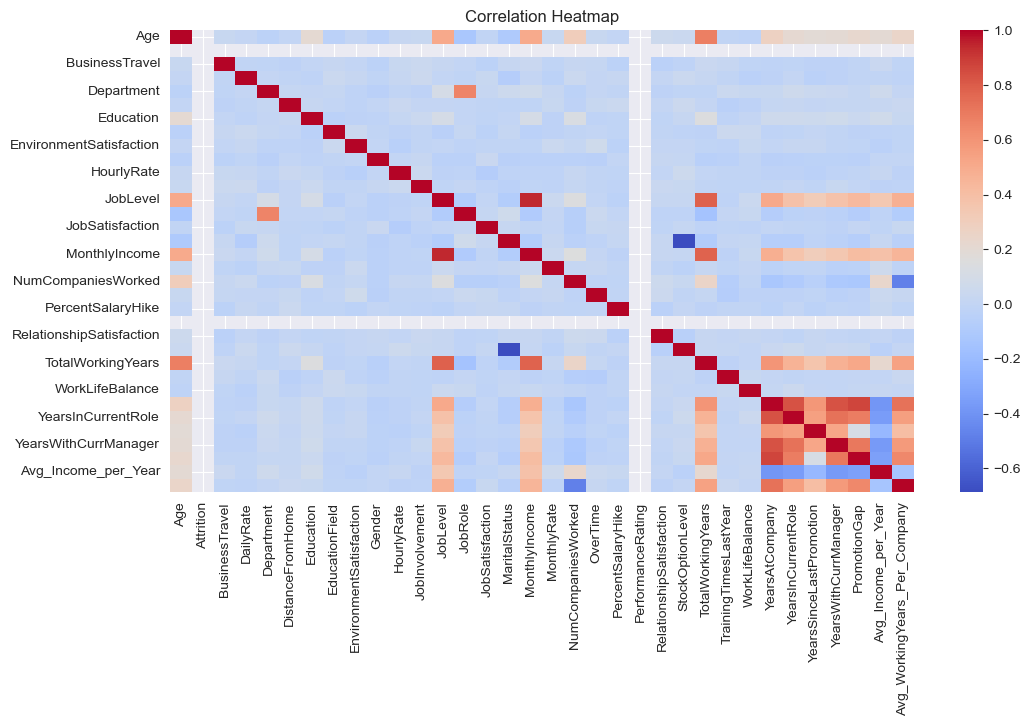

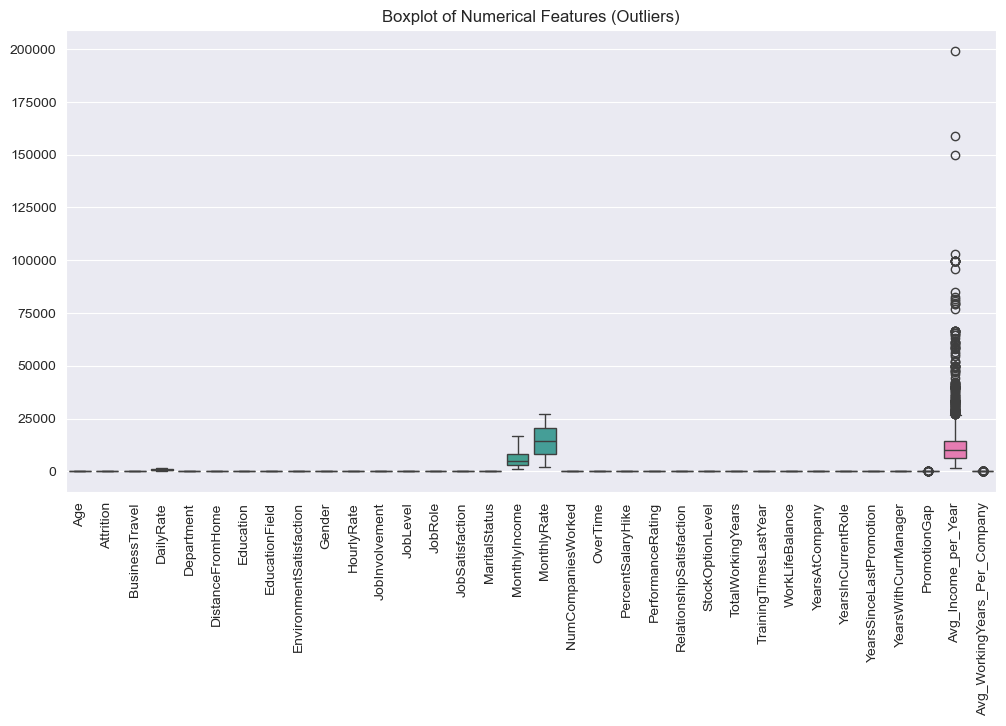

C:\Users\shekh\AppData\Local\Temp\ipykernel_18704\3293730009.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='PromotionGap', data=df, palette="Set2")


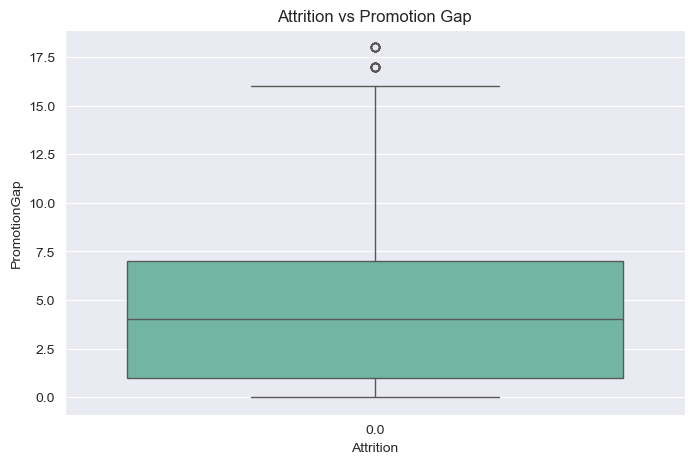

C:\Users\shekh\AppData\Local\Temp\ipykernel_18704\3293730009.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='Avg_Income_per_Year', data=df, palette="Set3")


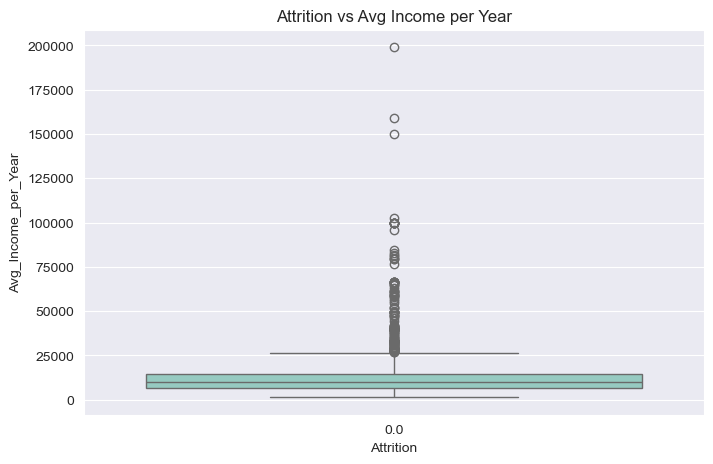

C:\Users\shekh\AppData\Local\Temp\ipykernel_18704\3293730009.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='Avg_WorkingYears_Per_Company', data=df, palette="Set1")


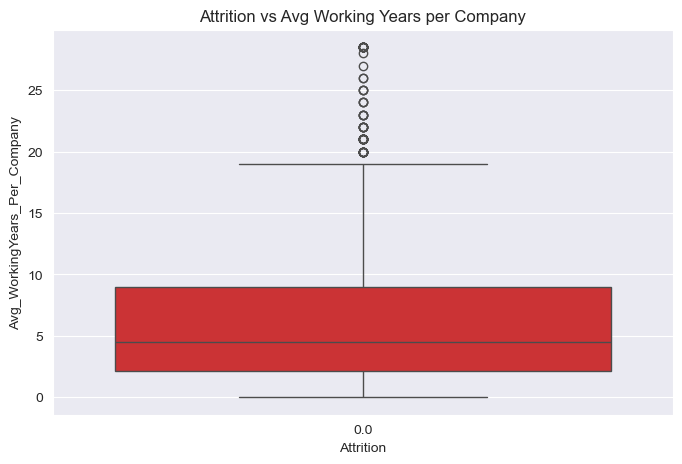

In [17]:
#Introduction
# In this project, we analyze an Employee Attrition dataset to identify key factors influencing whether employees stay or leave.
# The objective: Clean the data,Perform exploratory analysis and engineer features that provide insights before building classification models.

#Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

plt.rcParams['figure.figsize'] = (8, 5)
sns.set_style("darkgrid")

#Loading dataset
df = pd.read_csv("D:/NexGen/Week 9/Employee_Attrition.csv")
df.head()

#Understanding data
print("Shape of dataset:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

#Data cleaning
#Handling missing values
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

#Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

#Handle outliers using IQR method
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

#Feature Engineering(for EDA only)
#Promotion gap = Years worked - years since last promotion
df["PromotionGap"] = df["YearsAtCompany"] - df["YearsSinceLastPromotion"]

#Avg income per year = annual salary / years worked
df["Avg_Income_per_Year"] = (df["MonthlyIncome"] * 12) / (df["YearsAtCompany"] + 1)

#Loyalty measure = working years per company
df["Avg_WorkingYears_Per_Company"] = np.where(df["NumCompaniesWorked"] > 0,
                                              df["TotalWorkingYears"] / df["NumCompaniesWorked"],
                                              df["TotalWorkingYears"])
#Overall attrition Percentage
attrition_rate = (df["Attrition"].sum() / len(df)) * 100
print(f"Overall Attrition Percentage: {attrition_rate:.2f}%")

#Univariate Analysis
#Target variable distribution:
sns.countplot(x='Attrition', data=df, palette="Set2")
plt.title("Employee Attrition Distribution")
plt.show()

#Numerical features distribution:
df.hist(figsize=(12, 9), bins=17, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

#Bivariate Analysis
#Attrition by Job Role
sns.countplot(x='JobRole', hue='Attrition', data=df, palette="Set1")
plt.xticks(rotation=45)
plt.title("Attrition by Job Role")
plt.show()

#Attrition vs Monthly Income
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette="Set3")
plt.title("Attrition vs Monthly Income")
plt.show()

#Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#Outlier Visualisation
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features (Outliers)")
plt.show()

#Engineered Features Analysis
#Promotion Gap vs Attrition
sns.boxplot(x='Attrition', y='PromotionGap', data=df, palette="Set2")
plt.title("Attrition vs Promotion Gap")
plt.show()

#Avg Income per Year vs Attrition
sns.boxplot(x='Attrition', y='Avg_Income_per_Year', data=df, palette="Set3")
plt.title("Attrition vs Avg Income per Year")
plt.show()

#Avg Working Years per Company vs Attrition
sns.boxplot(x='Attrition', y='Avg_WorkingYears_Per_Company', data=df, palette="Set1")
plt.title("Attrition vs Avg Working Years per Company")
plt.show()
